In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("titanic_train.csv")

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<AxesSubplot:>

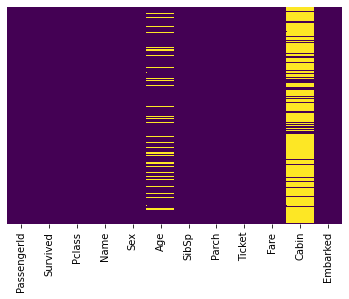

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

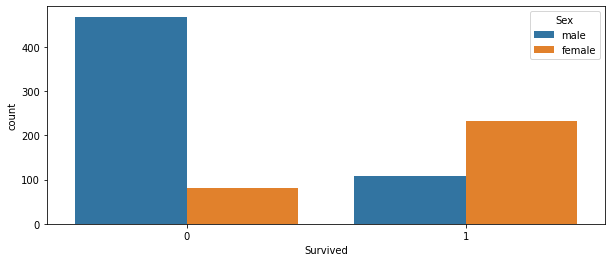

In [5]:
plt.figure(figsize=(10,4))
sns.countplot(x="Survived",hue="Sex",data=df)
plt.show()

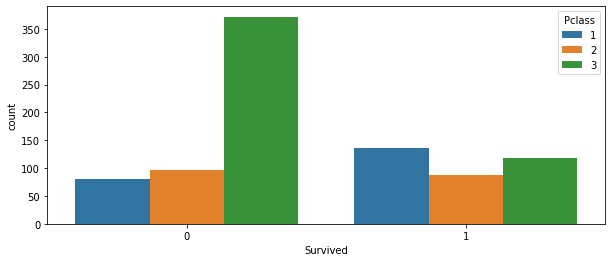

In [6]:
plt.figure(figsize=(10,4))
sns.countplot(x="Survived",hue="Pclass",data=df)
plt.show()

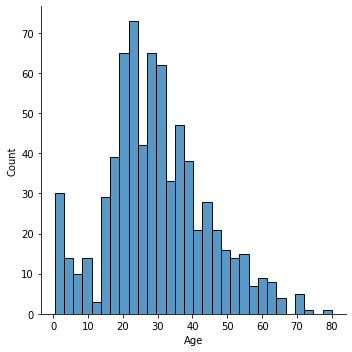

In [7]:

sns.displot(df.Age.dropna(),kde=False,bins=30)
plt.show()

<AxesSubplot:ylabel='Frequency'>

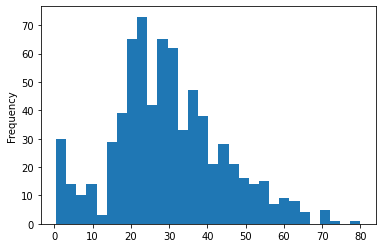

In [8]:
df.Age.plot.hist(bins=30)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

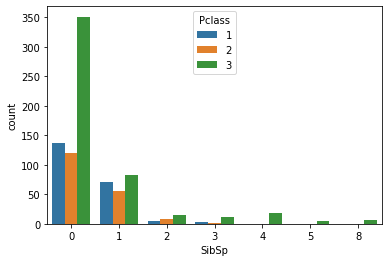

In [10]:
sns.countplot(x="SibSp",hue="Pclass",data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

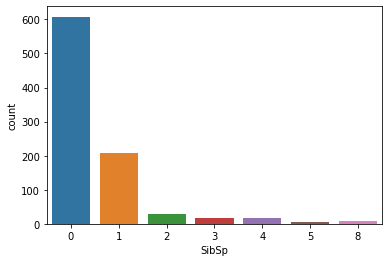

In [11]:
sns.countplot(x="SibSp",data=df)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

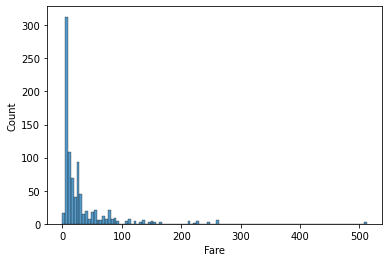

In [12]:
sns.histplot(x="Fare",data=df)

<AxesSubplot:>

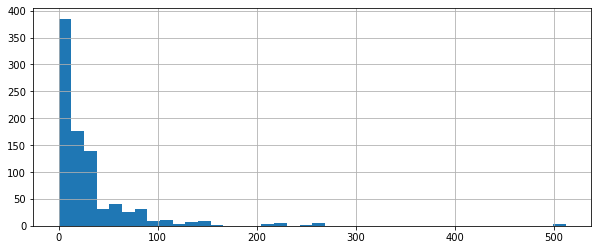

In [13]:
df.Fare.hist(bins=40,figsize=(10,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

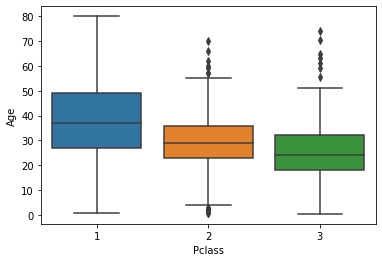

In [15]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [17]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age 


In [18]:
df.Age=df[["Age","Pclass"]].apply(impute_age,axis=1)

<AxesSubplot:>

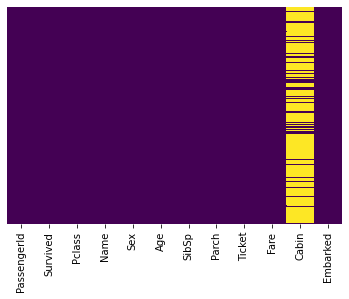

In [19]:
sns.heatmap(data=df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [20]:
df.drop("Cabin",axis=1,inplace=True)

In [21]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [22]:
df.dropna(inplace=True)

<AxesSubplot:>

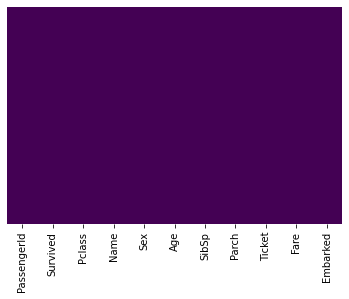

In [23]:
sns.heatmap(data=df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [24]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [25]:
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [26]:
embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [27]:
df=pd.concat([df,sex,embarked],axis=1)

In [28]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  male  Q  S  
0      0         A/5 21171   7.2500        S     1  0  1  
1      0          PC 17599  71.2833        C     0  0  0  
2      0  STON/O2. 3101282   7.9250        S     0  0  1  
3      0            113803  53.1000        S     0  0  1  
4      0            373450   8.0500        S     1  0  1

In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')

In [30]:
df.drop([ 'Name','Embarked', 'Sex', 'Ticket'],axis=1,inplace=True)

In [31]:
df.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

In [32]:
df.drop("PassengerId",axis=1,inplace=True)

In [33]:
Pclass=pd.get_dummies(df.Pclass,drop_first=True)

In [34]:
Pclass

2  3
0    0  1
1    0  0
2    0  1
3    0  0
4    0  1
..  .. ..
886  1  0
887  0  0
888  0  1
889  0  0
890  0  1

[889 rows x 2 columns]

In [35]:
df=pd.concat([df,Pclass],axis=1)

In [36]:
df.drop("Pclass",axis=1,inplace=True)

In [37]:
df

Survived   Age  SibSp  Parch     Fare  male  Q  S  2  3
0           0  22.0      1      0   7.2500     1  0  1  0  1
1           1  38.0      1      0  71.2833     0  0  0  0  0
2           1  26.0      0      0   7.9250     0  0  1  0  1
3           1  35.0      1      0  53.1000     0  0  1  0  0
4           0  35.0      0      0   8.0500     1  0  1  0  1
..        ...   ...    ...    ...      ...   ... .. .. .. ..
886         0  27.0      0      0  13.0000     1  0  1  1  0
887         1  19.0      0      0  30.0000     0  0  1  0  0
888         0  24.0      1      2  23.4500     0  0  1  0  1
889         1  26.0      0      0  30.0000     1  0  0  0  0
890         0  32.0      0      0   7.7500     1  1  0  0  1

[889 rows x 10 columns]

In [38]:
X = df.drop("Survived",axis=1)
y = df.Survived

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logmodel=LogisticRegression()

In [43]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [44]:
predictions = logmodel.predict(X_test)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 33,  71]], dtype=int64)